In [ ]:
import json

In [ ]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='06320980-d791-4920-834b-3c5368522608',
  password='UKVXqFnwnNnZ',
  version='2018-03-16')

response = natural_language_understanding.analyze(
  text = text,
  features=Features(
    entities=EntitiesOptions(
      sentiment=True,
      limit=15))).get_result()

print(json.dumps(response, indent=2))

In [ ]:
response['keywords']

In [11]:
import pandas as pd

In [ ]:
train = pd.DataFrame.from_dict(response['entities'])

In [ ]:
train

In [ ]:
response['keywords']

In [ ]:
from typing import List

Vector = List[float]

class Word:
    def __init__(self, text: str, vector: Vector) -> None:
        self.text = text
        self.vector = vector

In [ ]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
type(model)

In [ ]:

w1 = "dirty"
model.wv.most_similar(positive=w1)

In [ ]:
import gensim

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)
# if you vector file is in binary format, change to binary=True


In [ ]:
sentence = ["London", "is", "the", "capital", "Great", "Britain"]
vectors = [model[w] for w in sentence]

In [ ]:
len(vectors)

In [ ]:
import PyPDF2 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
filename = '../Bollywood-Data-master/scripts-data/Highway.pdf' 

#open allows you to read the file

pdfFileObj = open(filename,'rb')

#The pdfReader variable is a readable object that will be parsed

pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

#discerning the number of pages will allow us to parse through all #the pages

num_pages = pdfReader.numPages
count = 0
text = ""


In [ ]:
num_pages

In [ ]:
type(pdfReader)

In [ ]:
pdfReader

In [ ]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
if text != "":
   text = text

#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text

else:
   text = textract.process(fileurl, method='tesseract', language='eng')

In [ ]:
len(text)

In [ ]:
text

In [ ]:
tokens = word_tokenize(text)

In [ ]:
tokens

In [ ]:
punctuations = ['(',')',';',':','[',']',',', '.']

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
keywords = [word for word in tokens if not word in stop_words and not word in punctuations]

In [ ]:
keywords

In [ ]:
len(keywords)

In [ ]:
import urllib2

In [ ]:

import urllib

page = urllib.request.urlopen("file:///home/shrutheeshir/Desktop/IBMHacks/python-sdk-master/abc.html").read()
print(page)

In [ ]:
len(page)

In [1]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'ascii'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [2]:
text = convert_pdf_to_txt('../Bollywood-Data-master/scripts-data/Kaminey.pdf')

In [3]:
type(text)

str

In [4]:
len(text)

149964

In [ ]:
text

In [ ]:
text

In [5]:
text2 = text.split('CUT TO')

In [6]:
type(text2)

list

In [7]:
len(text2)

99

In [8]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions



/home/shrutheeshir/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [9]:
natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='06320980-d791-4920-834b-3c5368522608',
  password='UKVXqFnwnNnZ',
  version='2018-03-16')


In [ ]:
for i,txt in enumerate(text2):
    response = natural_language_understanding.analyze(
      text = txt,
      features=Features(
        keywords=KeywordsOptions(
          sentiment=True,
          limit=5))).get_result()
    response['scene'] = i+1



In [ ]:
table1 = pd.DataFrame.from_dict(response['keywords'])

In [ ]:
response = natural_language_understanding.analyze(
  text = text2[3],
  features=Features(
    keywords=KeywordsOptions(
      sentiment=True,
      limit=5))).get_result()



In [ ]:
table1 = pd.DataFrame.from_dict(response['keywords'])
table1

In [ ]:
response = natural_language_understanding.analyze(
  text = text2[3],
  features=Features(
    entities=EntitiesOptions(
      sentiment=True,
      limit=5))).get_result()

table1 = pd.DataFrame.from_dict(response['entities'])
table1

In [ ]:
text2[2]

In [ ]:
response = natural_language_understanding.analyze(
  text = text2[2],
  features=Features(
    emotion=EmotionOptions())).get_result()



In [ ]:
response

In [ ]:
response['emotion']['document']

In [15]:
for i,txt in enumerate(text2):
    try:
        response = natural_language_understanding.analyze(
          text = txt,
          features=Features(
            emotion=EmotionOptions())).get_result()
        mbst = response['emotion']['document']['emotion']
        mbst['scene'] = i

        table1 = pd.DataFrame.from_dict(mbst, orient='index').squeeze()
        print(type(table1))

        main_table = main_table.append(table1)
        print(main_table)
    except:
        main_table = main_table.append({'anger':0, 'disgust':0,'fear':0, 'joy':0,'sadness':0, 'scene':i}, ignore_index=True)



<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.084404  0.085866  0.104446  0.551222  0.144774    1.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1  0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2  0.000000  0.000000  0.000000  0.000000  0.000000    2.0
0  0.094021  0.079932  0.059282  0.522797  0.113463    3.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1  0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2  0.000000  0.000000  0.000000  0.000000  0.000000    2.0
0  0.094021  0.079932  0.059282  0.522797  0.113463    3.0
0  0.422169  0.140115  0.103874  0.437291  0.479593    4.0
<class 'pandas.core.series.Series'>
      anger   disgust      fea

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
0   0.067073  0.164255  0.055955  0.483367  0.100322   12.0
0   0.081531  0.078771  0.078412  0.499433  0.122397   13.0
0   0.099197  0.141311  0.070766  0.523155  0.172451   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
0   0.067073  0.164255  0.055955  0.483367  0.100322   12.0
0   0.081531  0.078771  0.078412  0.499433  0.122397   13.0
0   0.099197  0.141311  0.070766  0.523155  0.172451   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
0   0.067073  0.164255  0.055955  0.483367  0.100322   12.0
0   0.081531  0.078771  0.078412  0.499433  0.122397   13.0
0   0.099197  0.141311  0.070766  0.523155  0.172451   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
0   0.067073  0.164255  0.055955  0.483367  0.100322   12.0
0   0.081531  0.078771  0.078412  0.499433  0.122397   13.0
0   0.099197  0.141311  0.070766  0.523155  0.172451   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
0   0.067073  0.164255  0.055955  0.483367  0.100322   12.0
0   0.081531  0.078771  0.078412  0.499433  0.122397   13.0
0   0.099197  0.141311  0.070766  0.523155  0.172451   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
0   0.067073  0.164255  0.055955  0.483367  0.100322   12.0
0   0.081531  0.078771  0.078412  0.499433  0.122397   13.0
0   0.099197  0.141311  0.070766  0.523155  0.172451   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.084404  0.085866  0.104446  0.551222  0.144774    1.0
2   0.000000  0.000000  0.000000  0.000000  0.000000    2.0
3   0.094021  0.079932  0.059282  0.522797  0.113463    3.0
4   0.422169  0.140115  0.103874  0.437291  0.479593    4.0
5   0.119469  0.106729  0.114837  0.149716  0.166639    5.0
6   0.442569  0.096340  0.071700  0.127275  0.510861    6.0
7   0.056820  0.052181  0.040362  0.133741  0.058966    7.0
8   0.114321  0.108030  0.063384  0.184946  0.518434    8.0
9   0.083584  0.038949  0.068215  0.586657  0.121875    9.0
10  0.435028  0.088999  0.076090  0.572249  0.097168   10.0
11  0.000000  0.000000  0.000000  0.000000  0.000000   11.0
12  0.067073  0.164255  0.055955  0.483367  0.100322   12.0
13  0.081531  0.078771  0.078412  0.499433  0.122397   13.0
14  0.099197  0.141311  0.070766  0.523155  0.172451   14.0
15  

In [ ]:
len(main_table)

In [ ]:
mbst = response['emotion']['document']['emotion']
mbst['scene'] = 3
mbst

In [ ]:
table1 = pd.DataFrame.from_dict(mbst, orient='index')
table1


In [12]:
main_table = pd.DataFrame()

In [16]:
main_table

,anger,disgust,fear,joy,sadness,scene
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.084404,0.085866,0.104446,0.551222,0.144774,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
3,0.094021,0.079932,0.059282,0.522797,0.113463,3.0
4,0.422169,0.140115,0.103874,0.437291,0.479593,4.0
5,0.119469,0.106729,0.114837,0.149716,0.166639,5.0
6,0.442569,0.096340,0.071700,0.127275,0.510861,6.0
7,0.056820,0.052181,0.040362,0.133741,0.058966,7.0
8,0.114321,0.108030,0.063384,0.184946,0.518434,8.0
9,0.083584,0.038949,0.068215,0.586657,0.121875,9.0


In [14]:
main_column.set_index('month')

NameError: name 'table1' is not defined

In [ ]:
main_table2 = main_table.append({'anger':0, 'disgust':0,'fear':0, 'joy':0,'sadness':0, 'scene':0}, ignore_index=True)

In [17]:
main_table2 = main_table

In [18]:
main_table2['scene'] = main_table2['scene'].astype(int)

In [19]:
main_table2

,anger,disgust,fear,joy,sadness,scene
0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.084404,0.085866,0.104446,0.551222,0.144774,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,0.094021,0.079932,0.059282,0.522797,0.113463,3
4,0.422169,0.140115,0.103874,0.437291,0.479593,4
5,0.119469,0.106729,0.114837,0.149716,0.166639,5
6,0.442569,0.096340,0.071700,0.127275,0.510861,6
7,0.056820,0.052181,0.040362,0.133741,0.058966,7
8,0.114321,0.108030,0.063384,0.184946,0.518434,8
9,0.083584,0.038949,0.068215,0.586657,0.121875,9


In [20]:
main_table2 = main_table.set_index('scene')
main_table2

,anger,disgust,fear,joy,sadness
scene,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.084404,0.085866,0.104446,0.551222,0.144774
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.094021,0.079932,0.059282,0.522797,0.113463
4,0.422169,0.140115,0.103874,0.437291,0.479593
5,0.119469,0.106729,0.114837,0.149716,0.166639
6,0.442569,0.096340,0.071700,0.127275,0.510861
7,0.056820,0.052181,0.040362,0.133741,0.058966
8,0.114321,0.108030,0.063384,0.184946,0.518434


In [24]:
main_table2[["anger", "disgust", "fear", "joy", "sadness"]].plot(kind="line")

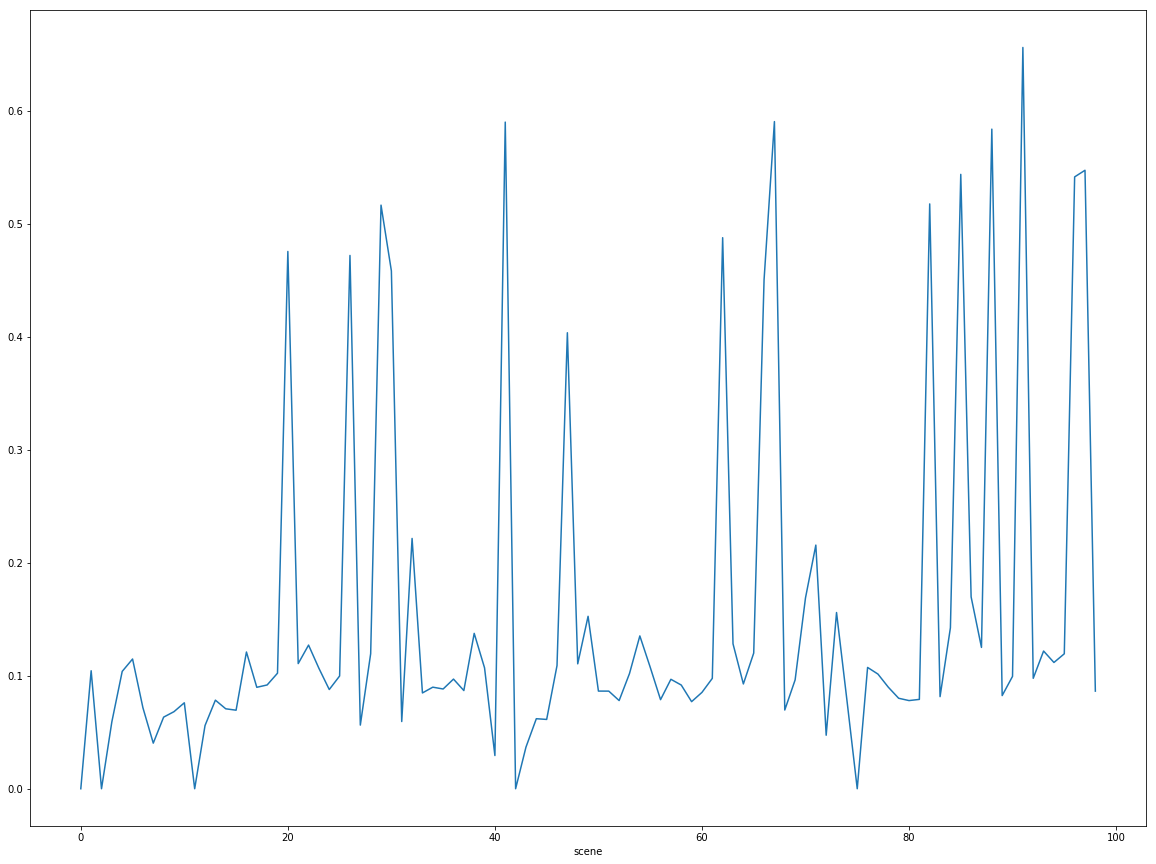

In [31]:
main_table2.fear.plot(figsize = (20,15))

In [32]:
import pandas as pd
import numpy as np
import math
data = pd.read_csv("../Bollywood-Data-master/wikipedia-data/coref_plot.csv") 
data.head(30)

,Unnamed: 0,Movie Name,Coref Plot
0,0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...
1,1,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...
2,2,Aan Milo Sajna,The Diwan convinces Anil to mend Anil ways g...
3,3,Aan Milo Sajna,Shortly thereafter Anil does appear to have m...
4,4,Aan Milo Sajna,Deepali moves in the mansion looks after Sav...
5,5,Aan Milo Sajna,What Savitri does not know is that Anil has h...
6,6,Abhinetri,A chance meeting between an Assistant Scienti...
7,7,Abhinetri,While Shekar has a mother who lives separatel...
8,8,Abhinetri,Shekar 's mom approves of Anjana and both ge...
9,9,Abhinetri,Anjana stops Anjana involvement in dancing an...


In [33]:
data

,Unnamed: 0,Movie Name,Coref Plot
0,0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...
1,1,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...
2,2,Aan Milo Sajna,The Diwan convinces Anil to mend Anil ways g...
3,3,Aan Milo Sajna,Shortly thereafter Anil does appear to have m...
4,4,Aan Milo Sajna,Deepali moves in the mansion looks after Sav...
5,5,Aan Milo Sajna,What Savitri does not know is that Anil has h...
6,6,Abhinetri,A chance meeting between an Assistant Scienti...
7,7,Abhinetri,While Shekar has a mother who lives separatel...
8,8,Abhinetri,Shekar 's mom approves of Anjana and both ge...
9,9,Abhinetri,Anjana stops Anjana involvement in dancing an...


In [34]:
datax = data.groupby('Movie Name')
datax